<a href="https://colab.research.google.com/github/deva-kumari/devakumari_cse22237/blob/main/lab4%20updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier  # Replace with your model

# Load the dataset
dataset_path = '/mnt/cc_embed_data (1).csv'  # Path to your dataset
data = pd.read_csv(dataset_path)

# Specify the target column
target_column = 'Final_Marks'

# Separate features and target
X = data.drop(target_column, axis=1)
y = data[target_column]

# Check if target is continuous or categorical and adjust if necessary
if y.nunique() > 10:  # For a continuous target, consider regression instead of classification
    print("The target variable is continuous. You might want to use regression metrics instead.")
else:
    # Convert target to categorical if it is continuous
    y = pd.cut(y, bins=3, labels=False)  # Example: Binning continuous target into 3 categories

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train your model
model = RandomForestClassifier()  # Replace with your chosen model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Compute performance metrics with zero_division set to 1 to avoid warnings
print("Confusion Matrix (Training):")
print(conf_matrix_train)
print("\nConfusion Matrix (Test):")
print(conf_matrix_test)

print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred, zero_division=1))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, zero_division=1))


The target variable is continuous. You might want to use regression metrics instead.
Confusion Matrix (Training):
[[  5   0   0   0   0   0   0   0   0   0   0]
 [  0  19   0   0   0   0   0   0   0   0   0]
 [  0   0  41   0   1   0   0   0   1   0   0]
 [  0   0   0  98   1   0   0   0   0   0   0]
 [  0   0   0   1 136   7   0   0   0   0   0]
 [  0   0   0   2   0 151   0   0   0   0   0]
 [  0   0   0   0   1   2 179   0   1   0   1]
 [  0   0   0   1   0   2   1 133   0   0   0]
 [  0   0   0   0   0   0   0   0  69   0   0]
 [  0   0   0   0   0   0   0   0   0  29   0]
 [  0   0   0   0   0   0   0   0   0   1  57]]

Confusion Matrix (Test):
[[ 0  1  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  2  1  2  0  0  0  0]
 [ 0  0  6  0  1  1  2  0  0  0  0]
 [ 0  0  2  9 11  3  2  1  0  1  0]
 [ 0  0  2  5 13  7  5  1  0  0  2]
 [ 0  0  0  4  3 19 11  3  1  0  0]
 [ 0  0  0  0  1  4 19  8  2  0  4]
 [ 0  0  0  1  3  2 16 14  4  2  3]
 [ 0  0  0  0  0  2  3  7  0  1  2]
 [ 0  0  0  0  1  

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load dataset
data = pd.read_csv('/mnt/cc_embed_data (1).csv')

# Display the first few rows and column names
print(data.head())
print(data.columns)

# Assuming 'Final_Marks' is the target column and all other columns are features
X = data.drop('Final_Marks', axis=1)
y = data['Final_Marks']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")


   cc_embedding_0  cc_embedding_1  cc_embedding_2  cc_embedding_3  \
0       -1.543605        1.192574        1.600436       -1.540511   
1       -1.416784        1.277785        1.634119       -1.646463   
2       -1.563877        1.208654        1.569922       -1.536870   
3       -1.493047        0.999892        1.603005       -1.372708   
4       -1.579709        1.184545        1.641025       -1.530369   

   cc_embedding_4  cc_embedding_5  cc_embedding_6  cc_embedding_7  \
0        0.049140        0.597720       -1.806607       -1.382916   
1        0.075007        0.640903       -1.820755       -1.488606   
2        0.033661        0.619467       -1.809974       -1.387395   
3        0.088974        0.586771       -1.781855       -1.537741   
4        0.069332        0.606778       -1.795736       -1.373387   

   cc_embedding_8  cc_embedding_9  ...  cc_embedding_759  cc_embedding_760  \
0        0.205932       -0.294248  ...         -1.997459          0.529766   
1        0.254

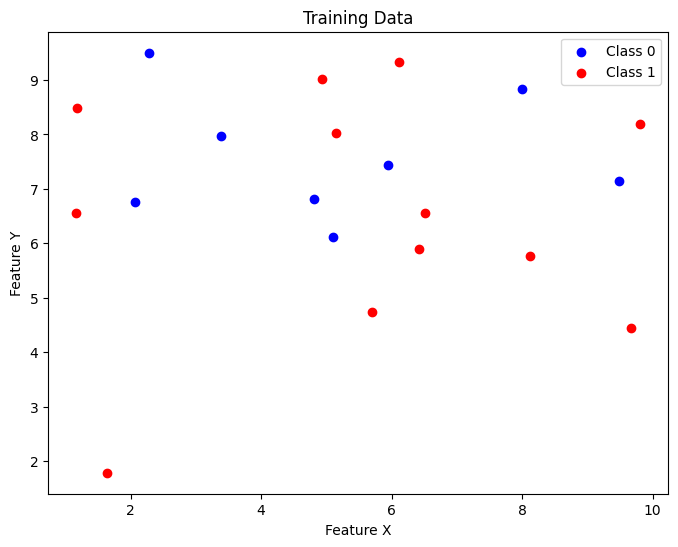

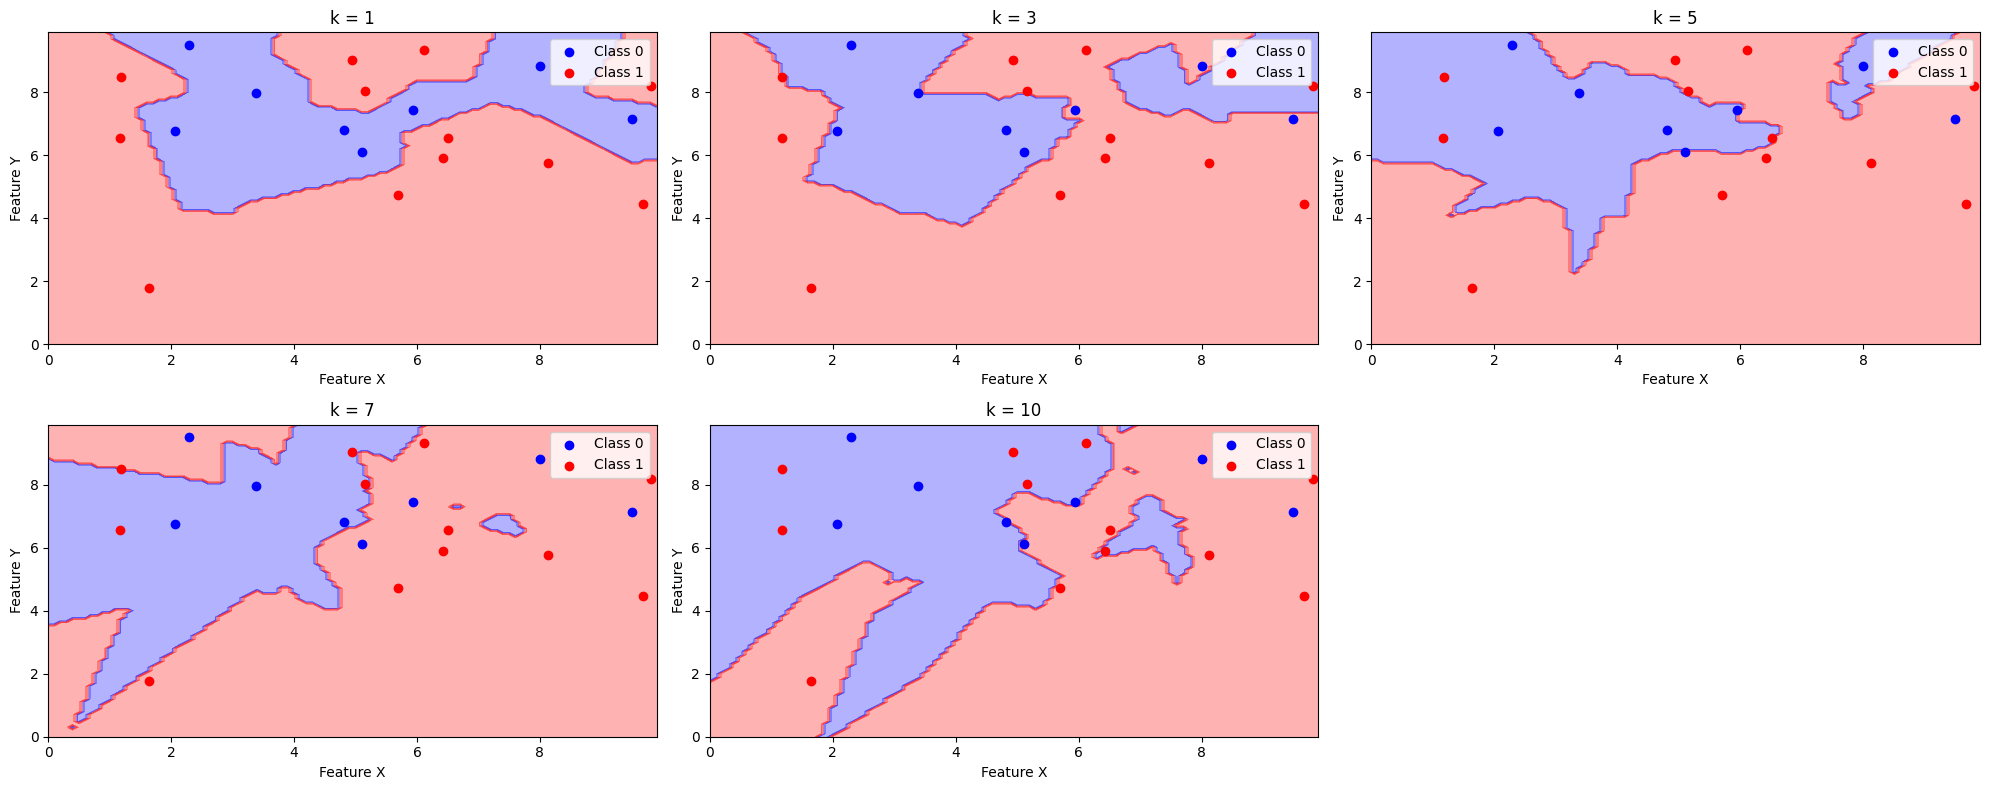

Best k value: 7


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# A3: Generate and plot training data
np.random.seed(0)
X_train = np.random.uniform(1, 10, size=(20, 2))  # 20 data points with 2 features
y_train = np.random.choice([0, 1], size=20)  # Assign to 2 classes (0 and 1)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Training Data')
plt.legend()
plt.show()

# A4: Generate test set data and classify using kNN
x_min, x_max = 0, 10
y_min, y_max = 0, 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
test_data = np.c_[xx.ravel(), yy.ravel()]

def plot_decision_boundary(k_values):
    num_k = len(k_values)
    num_cols = min(3, num_k)  # Set number of columns based on number of k values
    num_rows = (num_k + num_cols - 1) // num_cols  # Compute number of rows

    plt.figure(figsize=(20, 4 * num_rows))

    for i, k in enumerate(k_values):
        plt.subplot(num_rows, num_cols, i + 1)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        Z = knn.predict(test_data)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'red']))
        plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0')
        plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1')
        plt.title(f'k = {k}')
        plt.xlabel('Feature X')
        plt.ylabel('Feature Y')
        plt.legend()

    plt.tight_layout()
    plt.show()

k_values = [1, 3, 5, 7, 10]
plot_decision_boundary(k_values)  # A4: Plot decision boundaries for various k

# A5: Repeat the above steps for various k values and observe class boundaries
# k_values already used in plot_decision_boundary function

# A6: Repeat the above steps for your project data
project_data = pd.read_csv('/mnt/cc_embed_data (1).csv')  # Update with your path
target_column = 'Final_Marks'
feature_columns = [f'cc_embedding_{i}' for i in range(2)]  # Example: Use first 2 embeddings

X_project = project_data[feature_columns]
y_project = (project_data[target_column] > project_data[target_column].median()).astype(int)  # Binarize target for classification

# Split project data for training and testing
X_train_project, X_test_project, y_train_project, y_test_project = train_test_split(X_project, y_project, test_size=0.3, random_state=0)

# A7: Hyperparameter tuning with GridSearchCV
param_grid = {'n_neighbors': [1, 3, 5, 7, 10]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_project, y_train_project)

print(f'Best k value: {grid_search.best_params_["n_neighbors"]}')
